In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_load = ("data/city_data.csv")
ride_data_load = ("data/ride_data.csv")

# Read the City and Ride Data
city_data = pd.read_csv(city_data_load)
ride_data = pd.read_csv(ride_data_load)
# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, how="left", on=["city"])
# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
pyber_data_rural_df = pyber_data.loc[pyber_data["type"] == "Rural", :]
ride_city_df_group_rural = pyber_data_rural_df.groupby(["city","type"])
ride_city_df_rideid_ctr_rural = ride_city_df_group_rural["ride_id"].count()
ride_city_df_driver_ctr_rural = ride_city_df_group_rural["driver_count"].count()
ride_city_df_avgfare_rural = ride_city_df_group_rural["fare"].mean()


In [3]:
pyber_data_urban_df = pyber_data.loc[pyber_data["type"] == "Urban", :]
ride_city_df_group_urban = pyber_data_urban_df.groupby(["city","type"])
ride_city_df_rideid_ctr_urban = ride_city_df_group_urban["ride_id"].count()
ride_city_df_driver_ctr_urban = ride_city_df_group_urban["driver_count"].count()
ride_city_df_avgfare_urban = ride_city_df_group_urban["fare"].mean()

In [4]:
pyber_data_suburban_df = pyber_data.loc[pyber_data["type"] == "Suburban", :]
ride_city_df_group_suburban = pyber_data_suburban_df.groupby(["city","type"])
ride_city_df_rideid_ctr_suburban = ride_city_df_group_suburban["ride_id"].count()
ride_city_df_driver_ctr_suburban = ride_city_df_group_suburban["driver_count"].count()
ride_city_df_avgfare_suburban = ride_city_df_group_suburban["fare"].mean()

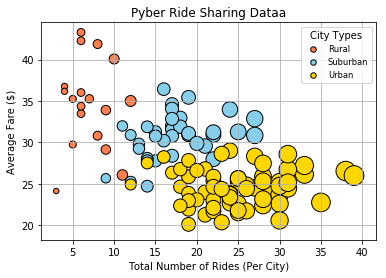

In [5]:
plt.scatter(ride_city_df_rideid_ctr_rural, 
            ride_city_df_avgfare_rural, 
            s=10*ride_city_df_driver_ctr_rural, 
            marker="o", 
            c="coral", 
            edgecolors="black", 
            label = "Rural")
plt.scatter(ride_city_df_rideid_ctr_suburban, 
            ride_city_df_avgfare_suburban, 
            s=10*ride_city_df_driver_ctr_suburban, 
            marker="o", 
            c="skyblue", 
            edgecolors="black", 
            label = "Suburban")
plt.scatter(ride_city_df_rideid_ctr_urban, 
            ride_city_df_avgfare_urban, 
            s=10*ride_city_df_driver_ctr_urban, 
            marker="o", 
            c="gold", 
            edgecolors="black", 
            label = "Urban")

plt.title("Pyber Ride Sharing Dataa")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

x=('city_total_rides')
y=('city_avg_fare')
plt.grid()
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.savefig("Pyber.png")

In [6]:
# Show plot
plt.show()

## Total Fares by City Type

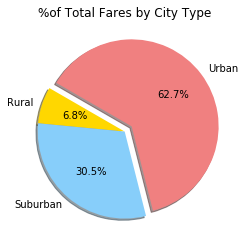

In [7]:
# Calculate Type Percents
tot_city_fare_type = 100 * pyber_data.groupby(["type"]).sum()["fare"] / pyber_data["fare"].sum()

# Build Pie Chart
plt.pie(tot_city_fare_type,
        labels =["Rural","Suburban","Urban"],
        colors =["gold","lightskyblue","lightcoral"],
        explode =[0,0,0.1],
        autopct='%1.1f%%',
        shadow =True, startangle =150)
# Save Figure
plt.title("%of Total Fares by City Type")
plt.savefig("Fig1.png")
plt.show()

In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

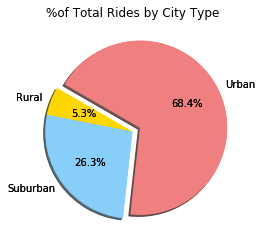

In [9]:
# Calculate Ride Percents
tot_city_ride_type = 100 * pyber_data.groupby(["type"]).count()["ride_id"] / pyber_data["ride_id"].count()

plt.pie(tot_city_ride_type,
        labels =["Rural","Suburban","Urban"],
        colors =["gold","lightskyblue","lightcoral"],
        explode =[0,0,0.1], 
        autopct='%1.1f%%',
        shadow =True, startangle =150)
# Build Pie Chart
plt.pie(tot_city_ride_type,
        labels =["Rural","Suburban","Urban"],
        colors =["gold","lightskyblue","lightcoral"],
        explode =[0,0,0.1],
        autopct='%1.1f%%',
        shadow =True, startangle =150)
plt.title("%of Total Rides by City Type")
# Save Figure
plt.savefig("Fig3.png")

In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

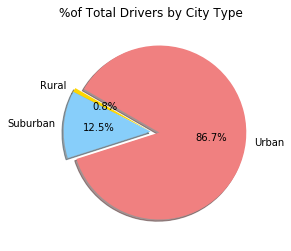

In [11]:
# Calculate Driver Percents
tot_city_count_type = 100 * pyber_data.groupby(["type"]).sum()["driver_count"] / pyber_data["driver_count"].sum()

# Build Pie Charts
plt.pie(tot_city_count_type,
        labels =["Rural","Suburban","Urban"],
        colors =["gold","lightskyblue","lightcoral"],
        explode =[0,0,0.1],
        autopct='%1.1f%%',
        shadow =True, startangle =150)

plt.title("%of Total Drivers by City Type")
# Save Figure
plt.savefig("Fig2.png")

In [12]:
# Show Figure
plt.show()